<a href="https://colab.research.google.com/github/M22AIE212/M22AIE212_SpeechUnderstanding_Assignment3/blob/main/A3_Custom_Dataset_LA_DF_model_evaluation_M22AIE212.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Git clone SSL_Anti-spoofing

In [1]:
!git clone https://github.com/M22AIE212/M22AIE212_SpeechUnderstanding_Assignment3.git

Cloning into 'M22AIE212_SpeechUnderstanding_Assignment3'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 72 (delta 40), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (72/72), 24.38 KiB | 3.05 MiB/s, done.
Resolving deltas: 100% (40/40), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!wget https://dl.fbaipublicfiles.com/fairseq/wav2vec/xlsr2_300m.pt

--2024-05-01 05:09:40--  https://dl.fbaipublicfiles.com/fairseq/wav2vec/xlsr2_300m.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.173.166.51, 18.173.166.74, 18.173.166.48, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.173.166.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3808868242 (3.5G) [binary/octet-stream]
Saving to: ‘xlsr2_300m.pt’

xlsr2_300m.pt       100%[===================>]   3.55G  34.2MB/s    in 99s     

2024-05-01 05:11:20 (36.7 MB/s) - ‘xlsr2_300m.pt’ saved [3808868242/3808868242]



## Setting up Environment

In [4]:
!sh /content/M22AIE212_SpeechUnderstanding_Assignment3/setup.sh

Cloning into 'SSL_Anti-spoofing'...
remote: Enumerating objects: 1579, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 1579 (delta 52), reused 82 (delta 48), pack-reused 1489
Receiving objects: 100% (1579/1579), 30.57 MiB | 16.82 MiB/s, done.
Resolving deltas: 100% (293/293), done.
Updating files: 100% (1247/1247), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 1.9 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.2.1+cu121
    Uninstalling torch-2.2.1+cu121:
      Successfully uninstalled torch-2.2.1+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.2.1+cu121 requires torch==2.2.1, but you have torch 1.11.0 which is incompatible.
torchdata 0.7.1 requires torch>=2, but you have torch 1.11.0 which is incompatible.
torchtex

## Dataset Pull

In [13]:
!mkdir /content/data
!unzip '/content/drive/MyDrive/Speech Understanding (1)/A3/Dataset_Speech_Assignment.zip' -d /content/data/

Archive:  /content/drive/MyDrive/Speech Understanding (1)/A3/Dataset_Speech_Assignment.zip
   creating: /content/data/Dataset_Speech_Assignment/
  inflating: /content/data/Dataset_Speech_Assignment/.DS_Store  
  inflating: /content/data/__MACOSX/Dataset_Speech_Assignment/._.DS_Store  
   creating: /content/data/Dataset_Speech_Assignment/Real/
   creating: /content/data/Dataset_Speech_Assignment/Fake/
  inflating: /content/data/Dataset_Speech_Assignment/Real/vad_04_zVVCun3C-oU.wav  
  inflating: /content/data/Dataset_Speech_Assignment/Real/vad_00_lxuaQDmrBg8.wav  
  inflating: /content/data/Dataset_Speech_Assignment/Real/vad_07_4jhJPdJPorY.wav  
  inflating: /content/data/Dataset_Speech_Assignment/Real/vad_00_akbwr49hP0A.wav  
  inflating: /content/data/Dataset_Speech_Assignment/Real/vad_00_U4px7ANlmck.wav  
  inflating: /content/data/Dataset_Speech_Assignment/Real/vad_11_ZWNArvn5-_Y.wav  
  inflating: /content/data/Dataset_Speech_Assignment/Real/vad_00_vbj9tOXCBu0.wav  
  inflating: /c

/content/data/Dataset_Speech_Assignment/Fake/en-US-Standard-J.wav
/content/data/Dataset_Speech_Assignment/Fake/en-US-Standard-J.flac
/content/data/Dataset_Speech_Assignment/Fake/Play.ht+-+short+story.wav
/content/data/Dataset_Speech_Assignment/Fake/Play.ht+-+short+story.flac
/content/data/Dataset_Speech_Assignment/Fake/Obama-sample.wav
/content/data/Dataset_Speech_Assignment/Fake/Obama-sample.flac
/content/data/Dataset_Speech_Assignment/Fake/dba46c933622273eace54e6c071a6216.mp3
/content/data/Dataset_Speech_Assignment/Fake/dba46c933622273eace54e6c071a6216.flac
/content/data/Dataset_Speech_Assignment/Fake/full_-MiaJSQIwiH93mWxCT8q.wav
/content/data/Dataset_Speech_Assignment/Fake/full_-MiaJSQIwiH93mWxCT8q.flac
/content/data/Dataset_Speech_Assignment/Fake/Jordan+US.wav
/content/data/Dataset_Speech_Assignment/Fake/Jordan+US.flac
/content/data/Dataset_Speech_Assignment/Fake/Fake_Fin.mp3
/content/data/Dataset_Speech_Assignment/Fake/Fake_Fin.flac
/content/data/Dataset_Speech_Assignment/Fake/en

/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Scores are saved to /content/la_score.txt
Total parameters: 317837834
Model loaded: /content/drive/MyDrive/Speech Understanding (1)/A3/Best_LA_model_for_DF.pth


/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Scores are saved to /content/df_score.txt
EER (Equal Error Rate) for LA model :  0.45


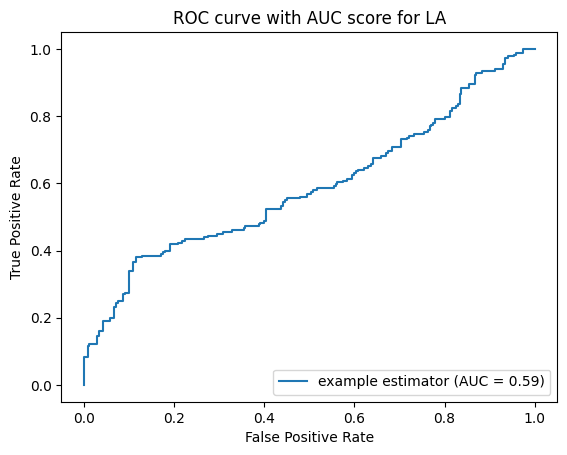

EER (Equal Error Rate) for DF model :  0.4049


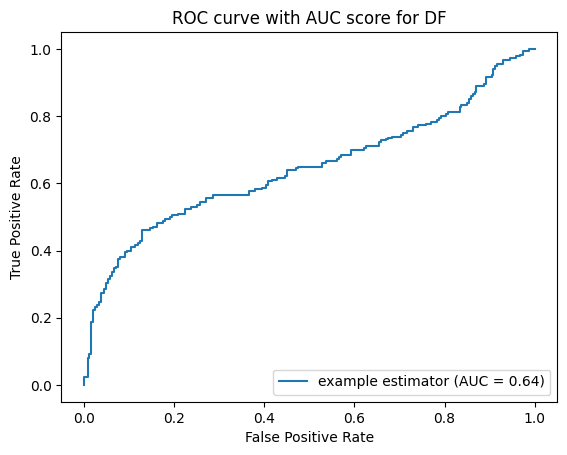

In [14]:
import sys
sys.path.append("/content/SSL_Anti-spoofing/")
sys.path.append("/content/M22AIE212_SpeechUnderstanding_Assignment3/")

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
from torch import Tensor
import librosa

from utils import convert_to_flac ,CustomDataset,Arguments,produce_evaluation_file,compute_eer,plot_roc_curve_with_auc
import glob
from model_loader import ModelLoader

if __name__ == "__main__" :
  ## set device
  device = 'cuda' if torch.cuda.is_available() else 'cpu'
  batch_size = 2

  ## Arguments
  args = Arguments(
      la_model_path='/content/drive/MyDrive/Speech Understanding (1)/A3/LA_model.pth',
      df_model_path='/content/drive/MyDrive/Speech Understanding (1)/A3/Best_LA_model_for_DF.pth',
      eval=True,
      la_eval_output='/content/la_score.txt',
      df_eval_output='/content/df_score.txt'
  )

  # ## Data Conversion
  input_directory = "/content/data/Dataset_Speech_Assignment"
  convert_to_flac(input_directory)


  ## Create a DataFrame with audio file paths
  df = pd.DataFrame(glob.glob("/content/data/Dataset_Speech_Assignment/*/*"), columns=['file_path'])

  ## Extract labels from file paths
  df['real_or_fake'] = df['file_path'].apply(lambda x: x.split('/')[-2])

  ## Assign labels (1 for 'Real', 0 for 'Fake')
  df['label'] = df['real_or_fake'].apply(lambda x: 1 if x == 'Real' else 0)


  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

  model_loader = ModelLoader(args, device)

  # Evaluation Dataset
  eval_set = CustomDataset(df.file_path.tolist(), df.label.tolist())

  ## Inference - LA model
  model = model_loader.load_model('la')
  produce_evaluation_file(eval_set,batch_size, model, device, args.la_eval_output)

  ## Inference - DF model
  model = model_loader.load_model('df')
  produce_evaluation_file(eval_set,batch_size, model, device, args.df_eval_output)

  ## Evaluation - LA model
  la_df = pd.read_csv('/content/la_score.txt', sep = ' ', header = None)
  la_df.columns = ['actual', 'scores']
  la_eer = compute_eer(la_df.actual, la_df.scores)
  print("Equal Error Rate = LA model : ", round(la_eer, 4))
  plot_roc_curve_with_auc(la_df.actual, la_df.scores, 'la')

  ## Evaluation - DF model
  df_df = pd.read_csv('/content/df_score.txt', sep = ' ', header = None)
  df_df.columns = ['truth', 'scores']
  df_eer = compute_eer(df_df.truth, df_df.scores)
  print("Equal Error Rate = DF model : ", round(df_eer, 4))
  plot_roc_curve_with_auc(df_df.truth, df_df.scores, 'df')